# Design Filter dengan Jendela

Penggunaan filter ideal (sinc) yang dikombinasikan dengan jendela berpanjang terbatas merupakan teknik standar dalam desain filter digital. Dengan mengalikan respons impuls ideal dengan jendela, kita dapat membentuk filter dengan karakteristik yang diinginkan, seperti lebar pita transisi yang sempit atau redaman stopband yang dalam, sambil tetap menjaga kausalitas filter.

Proses ini melibatkan konvolusi antara respons frekuensi filter ideal (sinc) dan respons frekuensi jendela yang dipilih. Sebagai contoh, jika menggunakan jendela Hamming, respons frekuensi jendela tersebut akan mempengaruhi bentuk respons frekuensi filter akhir, termasuk memperlebar lebar pita transisi dan menentukan karakteristik redaman stopband.

Dalam merancang filter, penting untuk memperhitungkan efek jendela yang digunakan. Hal ini termasuk memodifikasi frekuensi cutoff agar sesuai dengan lebar pita lulus atau stopband yang diinginkan, mengingat interaksi antara respons frekuensi filter ideal dan respons frekuensi jendela. Dengan pemahaman yang baik tentang konsep ini, kita dapat merancang filter digital yang memenuhi spesifikasi aplikasi dengan tepat.

# Contoh

1. Pemilihan Panjang Filter (N):
Panjang filter (jumlah koefisien) yang kita pilih harus cukup besar untuk memenuhi spesifikasi filter, namun juga tidak terlalu besar untuk menghindari kompleksitas yang berlebihan. Dalam kasus ini, kita menggunakan rumus empiris untuk menghitung panjang filter berdasarkan redaman stopband yang diinginkan (A_stop) dan lebar pita transisi (δf). Penyesuaian kemudian dilakukan untuk memastikan panjang filter adalah bilangan ganjil.
2. Rumuskan Filter Ideal (sinc):
Filter ideal (sinc) merupakan respons impuls dari filter low-pass ideal dengan karakteristik frekuensi yang diinginkan. Dalam rumus tersebut,
𝑓
𝑐
f
c
​
  adalah frekuensi cutoff dari filter yang diinginkan. Namun, filter sinc ideal memiliki panjang yang tak terbatas, sehingga perlu dipotong untuk membuat filter FIR berukuran terbatas.
3. Pilih Jendela (Hamming Window):
Jendela Hamming merupakan salah satu dari banyak jendela yang dapat digunakan untuk membatasi filter sinc menjadi bentuk FIR yang berukuran terbatas. Jendela ini dipilih karena memiliki sifat yang baik dalam mengurangi efek gelombang Gibbs (overshoot) yang umum terjadi saat memotong filter sinc. Fungsi jendela Hamming memberikan bobot yang lebih besar pada koefisien di tengah dan mereduksi bobot pada koefisien di ujung, menciptakan transisi yang halus dari sinyal lulus ke stopband.
4. Filtering dengan Jendela:
Proses ini melibatkan mengalikan respons impuls filter ideal dengan respons impuls dari jendela yang dipilih. Ini menciptakan efek 'penurunan' pada tepi filter dan menghasilkan bentuk akhir dari filter FIR yang memiliki karakteristik yang diinginkan.
5. Normalisasi:
Setelah mendapatkan respons impuls filter, normalisasi dilakukan agar respons frekuensi pada frekuensi cutoff menjadi 1. Hal ini penting untuk memastikan bahwa filter memiliki respons frekuensi yang diharapkan pada frekuensi cutoff yang telah ditentukan.

<ipython-input-10-4cc33882b4f8>:28: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n, h_windowed, use_line_collection=True)


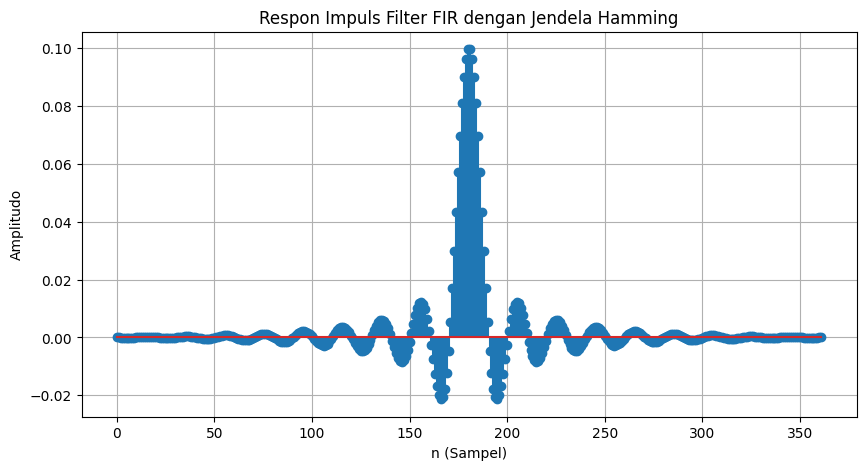

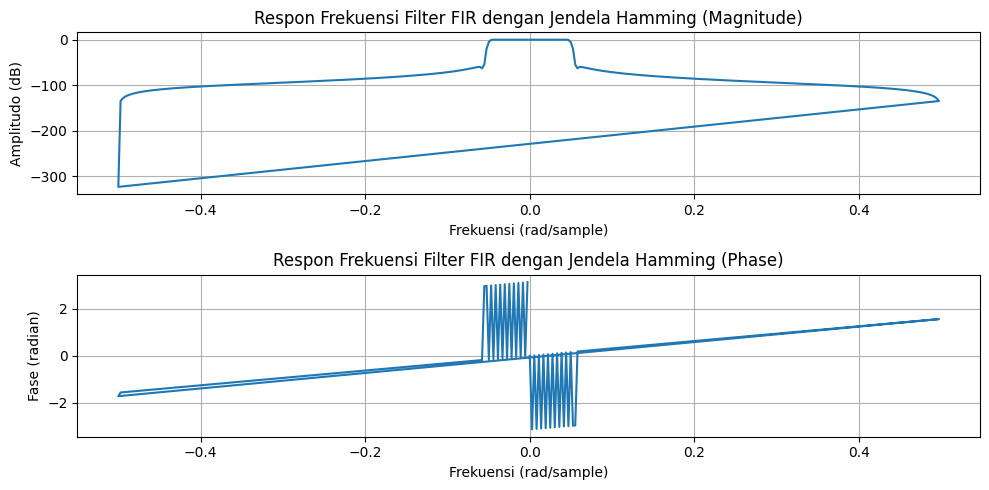

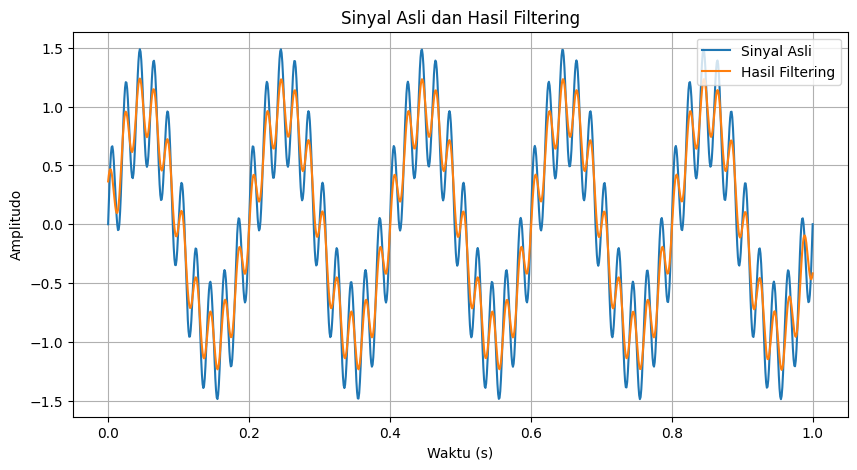

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Spesifikasi filter
fc = 0.1 * np.pi  # Frekuensi cutoff
A_stop = 60  # Redaman stopband (dB)
delta_f = 0.02 * np.pi  # Lebar pita transisi

# Panjang filter
N = int((A_stop - 8) / (2.285 * delta_f))
N = N + (N % 2)  # Pastikan N ganjil

# Buat filter sinc ideal
n = np.arange(N)
h_ideal = np.sin(fc * (n - (N-1)/2)) / (np.pi * (n - (N-1)/2) + np.finfo(float).eps)

# Buat jendela Hamming
w = 0.54 - 0.46 * np.cos(2 * np.pi * n / (N-1))

# Filter dengan jendela
h_windowed = h_ideal * w

# Normalisasi
h_windowed /= np.sum(h_windowed)

# Plot respons impuls
plt.figure(figsize=(10, 5))
plt.stem(n, h_windowed, use_line_collection=True)
plt.title('Respon Impuls Filter FIR dengan Jendela Hamming')
plt.xlabel('n (Sampel)')
plt.ylabel('Amplitudo')
plt.grid(True)
plt.show()

# Plot respons frekuensi (magnitude dan phase)
H_windowed = np.fft.fft(h_windowed)
freq = np.fft.fftfreq(N)
plt.figure(figsize=(10, 5))

# Plot respons frekuensi (magnitude)
plt.subplot(2, 1, 1)
plt.plot(freq, 20 * np.log10(np.abs(H_windowed)))
plt.title('Respon Frekuensi Filter FIR dengan Jendela Hamming (Magnitude)')
plt.xlabel('Frekuensi (rad/sample)')
plt.ylabel('Amplitudo (dB)')
plt.grid(True)

# Plot respons frekuensi (phase)
plt.subplot(2, 1, 2)
plt.plot(freq, np.angle(H_windowed))
plt.title('Respon Frekuensi Filter FIR dengan Jendela Hamming (Phase)')
plt.xlabel('Frekuensi (rad/sample)')
plt.ylabel('Fase (radian)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Sinyal asli
t = np.linspace(0, 1, 1000)
x = np.sin(2 * np.pi * 5 * t) + 0.5 * np.sin(2 * np.pi * 50 * t)

# Konvolusi dengan filter
y = np.convolve(x, h_windowed, mode='same')

# Plot sinyal hasil filtering
plt.figure(figsize=(10, 5))
plt.plot(t, x, label='Sinyal Asli')
plt.plot(t, y, label='Hasil Filtering')
plt.title('Sinyal Asli dan Hasil Filtering')
plt.xlabel('Waktu (s)')
plt.ylabel('Amplitudo')
plt.legend()
plt.grid(True)
plt.show()

1. Respon Impuls Filter FIR dengan Jendela Hamming:
Grafik ini menunjukkan respons impuls dari filter FIR yang telah dirancang menggunakan filter ideal (sinc) dikombinasikan dengan jendela Hamming. Respons impuls ini adalah tampilan dari koefisien filter dalam domain waktu. Garis vertikal pada grafik menunjukkan amplitudo dari setiap koefisien filter pada titik waktu tertentu. Anda dapat melihat bentuk respons impuls yang merupakan hasil dari konvolusi antara filter sinc ideal dan jendela Hamming.
2. Respon Frekuensi Filter FIR dengan Jendela Hamming (Magnitude):
Grafik ini menampilkan respons frekuensi dari filter FIR dalam domain magnitude. Ini menunjukkan bagaimana filter merespons terhadap berbagai frekuensi. Pada grafik ini, Anda dapat melihat bagaimana amplitudo respons filter bervariasi tergantung pada frekuensi, dengan nilai puncak pada frekuensi cutoff dan penurunan amplitudo pada frekuensi stopband. Filter FIR yang dirancang memiliki karakteristik low-pass dengan redaman yang mendekati nol pada frekuensi rendah dan meningkat pada frekuensi tinggi.
3. Respon Frekuensi Filter FIR dengan Jendela Hamming (Phase):
Grafik ini menampilkan respons frekuensi dari filter FIR dalam domain fase. Ini menunjukkan perubahan fase yang terjadi oleh filter pada berbagai frekuensi. Perubahan fase ini penting karena dapat mempengaruhi waktu kedatangan sinyal dan sinkronisasi antara komponen frekuensi dalam sinyal. Dalam kasus ini, fase filter berubah secara linier dengan frekuensi, yang merupakan karakteristik umum dari filter FIR linier.
4. Sinyal Asli dan Hasil Filtering:
Grafik ini menunjukkan sinyal asli sebelum proses filtering (disebut "Sinyal Asli") dan sinyal hasil dari proses filtering menggunakan filter FIR yang telah dirancang ("Hasil Filtering"). Sinyal asli terdiri dari dua komponen sinusoidal dengan frekuensi 5 Hz dan 50 Hz. Setelah proses filtering, sinyal tersebut mengalami perubahan sesuai dengan karakteristik filter FIR, seperti penekanan atau peningkatan pada komponen frekuensi tertentu, serta pergeseran fase. Dengan membandingkan kedua sinyal tersebut, Anda dapat melihat efek dari proses filtering pada sinyal asli.

Pengertian Fungsi Jendela:
Fungsi jendela dalam konteks pengolahan sinyal digital adalah fungsi matematis yang digunakan untuk memodifikasi sinyal dalam rentang waktu tertentu sebelum diterapkan pada algoritma pemrosesan sinyal. Tujuannya bisa bermacam-macam, termasuk meminimalkan efek leakage, mengurangi distorsi, memperbaiki resolusi frekuensi, atau mengurangi artefak dalam transformasi sinyal.

Berikut adalah penjelasan untuk masing-masing variasi jendela yang umum digunakan dalam pengolahan sinyal digital:

1. Rectangular Window:
  - Ini adalah jendela dasar yang memberikan bobot konstan pada semua sampel dalam rentang waktu.
  - Tidak memberikan penurunan amplitudo di ujung jendela, yang dapat menyebabkan efek leakage yang buruk dan distorsi pada spektrum sinyal.
2. Hamming Window:
  - Memberikan kompromi antara penurunan leakage dan resolusi frekuensi yang baik.
  - Memberikan penurunan amplitudo yang lebih cepat di ujung jendela, dibandingkan dengan Hanning window.
3. Hanning (Hann) Window:
  - Mirip dengan Hamming window, tetapi memiliki penurunan amplitudo yang lebih lambat di ujung jendela.
  - Ini membantu mengurangi efek ringing di sekitar puncak jendela.
4. Blackman Window:
  - Memberikan penurunan yang lebih lambat daripada Hamming dan Hanning windows di ujung jendela.
  - Ini menghasilkan penurunan leakage yang lebih baik, tetapi memiliki lebar utama yang lebih besar.
5. Kaiser Window:
  - Dikendalikan oleh parameter β, yang memungkinkan pengguna menyesuaikan lebar utama dan penurunan sisi.
  - Berguna ketika diperlukan kontrol presisi dalam aplikasi tertentu.
6. Flat Top Window:
  - Digunakan ketika presisi absolut dalam pengukuran amplitudo diperlukan.
  - Memiliki amplitudo yang konstan di puncak jendela.
7. Bartlett (Triangular) Window:
  - Memiliki respons frekuensi yang lebih rendah daripada Hamming dan Hanning windows, tetapi memiliki sisi yang lebih tajam.
  - Cocok untuk beberapa aplikasi tertentu di mana penekanan terhadap resolusi frekuensi lebih penting daripada penurunan leakage.

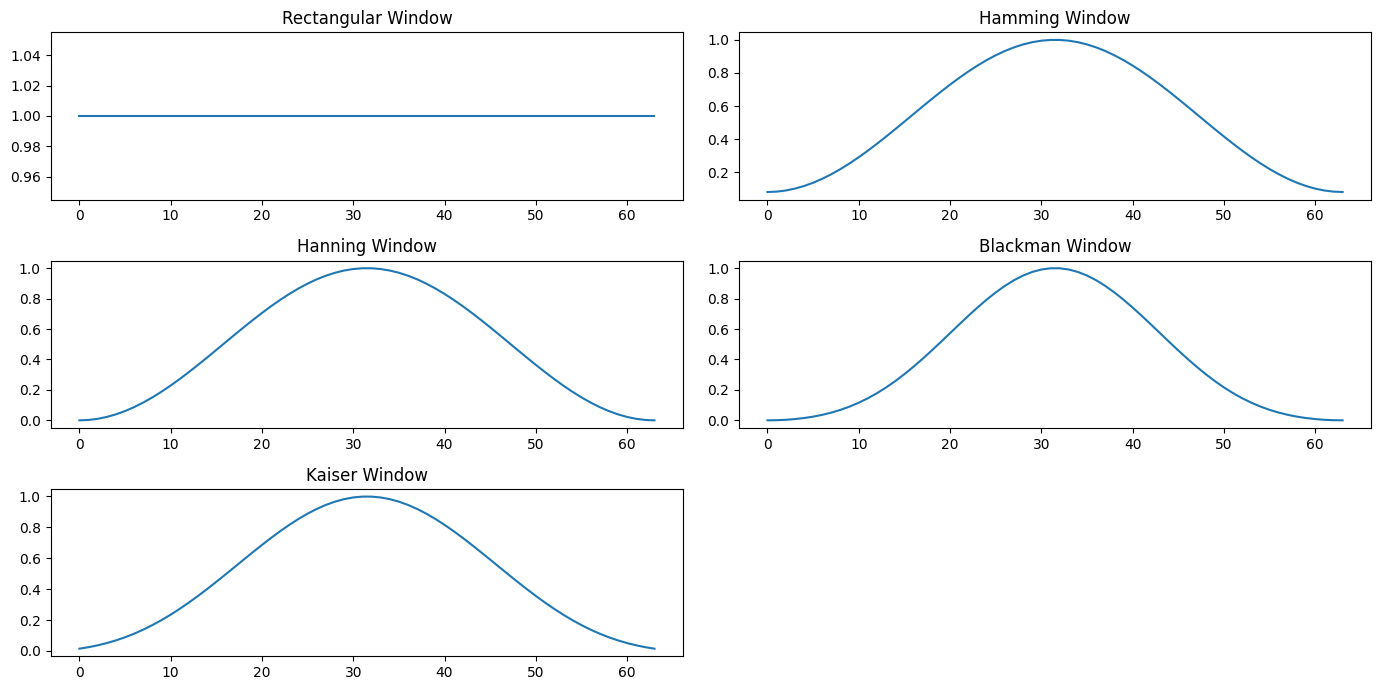

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Panjang jendela
N = 64

# Rectangular Window
rectangular_window = np.ones(N)

# Hamming Window
hamming_window = np.hamming(N)

# Hanning (Hann) Window
hanning_window = np.hanning(N)

# Blackman Window
blackman_window = np.blackman(N)

# Kaiser Window
kaiser_window = np.kaiser(N, beta=6)

# Plotting
plt.figure(figsize=(14, 7))

plt.subplot(3, 2, 1)
plt.plot(rectangular_window)
plt.title('Rectangular Window')

plt.subplot(3, 2, 2)
plt.plot(hamming_window)
plt.title('Hamming Window')

plt.subplot(3, 2, 3)
plt.plot(hanning_window)
plt.title('Hanning Window')

plt.subplot(3, 2, 4)
plt.plot(blackman_window)
plt.title('Blackman Window')

plt.subplot(3, 2, 5)
plt.plot(kaiser_window)
plt.title('Kaiser Window')

plt.tight_layout()
plt.show()